In [2]:
import tensorflow as tf 
from tensorflow import keras 
from keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
from tensorflow.keras import Model
import numpy as np
import pandas as pd 
import matplotlib as plt 
import matplotlib.pyplot as plt

In [31]:
#Getting the data and normalization 
(x_train,y_train),(x_test,y_test) =  keras.datasets.mnist.load_data()
X_train,X_val = x_train[:7000]/255.0, x_train[7000:]/255.0 
Y_train,Y_val = y_train[:7000], y_train[7000:] 
x_test =  x_test/255.0



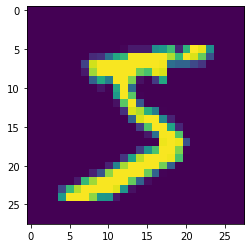

In [6]:
## example of the data (images from the Mnist dataset of hand-written digits)

plt.imshow(X_train[0])

In [59]:
#model layer structure 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(600,activation = 'relu'),
    keras.layers.Dropout(0.4, noise_shape=None, seed=None),
    keras.layers.Dense(300,activation = 'relu'),
    keras.layers.Dropout(0.7, noise_shape=None, seed=None),
    keras.layers.Dense(100,activation = 'relu'),
    
    keras.layers.Dense(10,activation = 'softmax')
    ])

In [60]:
#compiling model and training
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val))

Epoch 1/50
219/219 [==============================] - 6s 25ms/step - loss: 2.2641 - accuracy: 0.1756 - val_loss: 1.5874 - val_accuracy: 0.7119
Epoch 2/50
219/219 [==============================] - 5s 22ms/step - loss: 1.5965 - accuracy: 0.4930 - val_loss: 0.8409 - val_accuracy: 0.7938
Epoch 3/50
219/219 [==============================] - 5s 22ms/step - loss: 1.0587 - accuracy: 0.6499 - val_loss: 0.6014 - val_accuracy: 0.8311
Epoch 4/50
219/219 [==============================] - 5s 21ms/step - loss: 0.8530 - accuracy: 0.7229 - val_loss: 0.5061 - val_accuracy: 0.8511
Epoch 5/50
219/219 [==============================] - 5s 21ms/step - loss: 0.6967 - accuracy: 0.7789 - val_loss: 0.4462 - val_accuracy: 0.8693
Epoch 6/50
219/219 [==============================] - 5s 21ms/step - loss: 0.6215 - accuracy: 0.7999 - val_loss: 0.4237 - val_accuracy: 0.8705
Epoch 7/50
219/219 [==============================] - 5s 22ms/step - loss: 0.5311 - accuracy: 0.8348 - val_loss: 0.3832 - val_accuracy: 0.8859

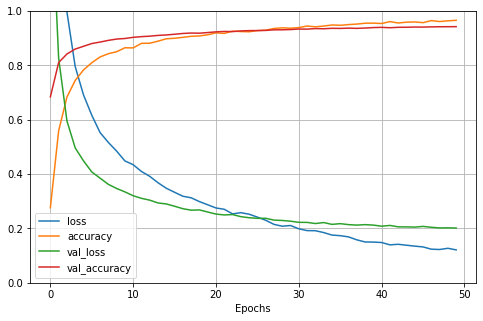

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('Epochs')
plt.show()

In [13]:
acc_num = 0
for image,label in zip(x_test[:100],y_test[:100]):
    output = model.predict(np.expand_dims(image,axis = 0))
    idx = np.argmax(output)
    if(idx  == label):
      acc_num+=1
      
accuracy =  acc_num/len(Y_test[:100]) 
print('the acuuracy of the model is' , accuracy)

    

the acuuracy of the model is 0.96


In [32]:
# now we use a simple cnn for classification and then analyse the difference 

# we will use towo conv layers only 

#model class
class conv_net(tf.keras.Model):
      def __init__(self):
        super(conv_net,self).__init__()
        self.conv1 = Conv2D(16, (3,3), activation='relu')
        self.conv2 = Conv2D(32, (3,3), activation='relu') 
        self.maxpool = MaxPooling2D((2, 2))
        self.lin_1 =  Flatten(input_shape = [7,7,1])
        self.lin_2 = Dense(10, activation = 'softmax')
        

      def call(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x =self.maxpool(x)
        x = self.lin_1(x)
        x = self.lin_2(x)
        return x

      


In [33]:

#reshape the input size to pass it to the conv net 
X_train = np.expand_dims(X_train, -1)
x_test = np.expand_dims(x_test, -1)
X_val = np.expand_dims(X_val, -1)

In [34]:
# creat model 

cnn_mod =  conv_net()

cnn_mod.build((None,28,28,1))

print(cnn_mod.summary())

Model: "conv_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  160       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  8010      
Total params: 12,810
Trainable params: 12,810
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
#compile model 
cnn_mod.compile(optimizer = 'adam', loss="sparse_categorical_crossentropy",metrics = ['accuracy'])

In [36]:
# We make a checke point to save the weights of the network with the best validation acuuracy 
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history = cnn_mod.fit(X_train, Y_train, batch_size=128,epochs=30, validation_data=(X_val, Y_val),callbacks=[model_checkpoint_callback])

Epoch 1/30
55/55 [==============================] - 10s 180ms/step - loss: 1.9873 - accuracy: 0.4107 - val_loss: 0.5714 - val_accuracy: 0.8390
Epoch 2/30
55/55 [==============================] - 9s 175ms/step - loss: 0.4275 - accuracy: 0.8820 - val_loss: 0.3215 - val_accuracy: 0.9029
Epoch 3/30
55/55 [==============================] - 9s 175ms/step - loss: 0.2603 - accuracy: 0.9223 - val_loss: 0.2519 - val_accuracy: 0.9253
Epoch 4/30
55/55 [==============================] - 10s 175ms/step - loss: 0.2061 - accuracy: 0.9424 - val_loss: 0.2120 - val_accuracy: 0.9362
Epoch 5/30
55/55 [==============================] - 10s 175ms/step - loss: 0.1619 - accuracy: 0.9516 - val_loss: 0.2037 - val_accuracy: 0.9394
Epoch 6/30
55/55 [==============================] - 10s 177ms/step - loss: 0.1325 - accuracy: 0.9626 - val_loss: 0.1743 - val_accuracy: 0.9460
Epoch 7/30
55/55 [==============================] - 10s 175ms/step - loss: 0.1247 - accuracy: 0.9674 - val_loss: 0.1476 - val_accuracy: 0.9552
E

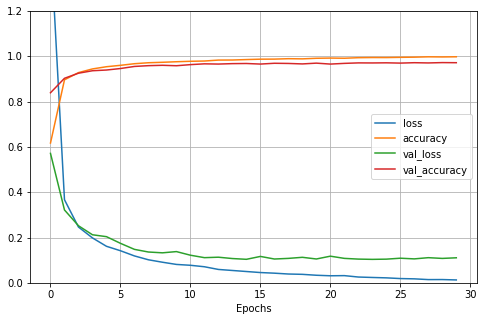

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.2) 
plt.xlabel('Epochs')
plt.show()

In [38]:
#load the model with the best validation accuracy 

cnn_mod.load_weights(checkpoint_filepath)

In [39]:
score = cnn_mod.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08385593444108963
Test accuracy: 0.9765999913215637


(28, 28, 1)


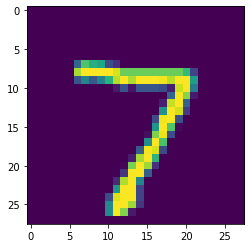

Prediction of the simple neural network is 7 while the prediction of the CNN is 7


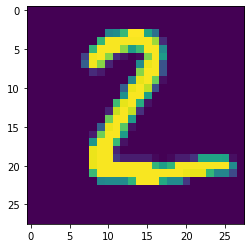

Prediction of the simple neural network is 2 while the prediction of the CNN is 2


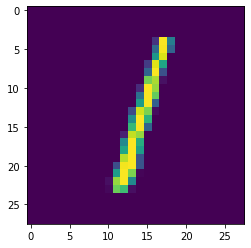

Prediction of the simple neural network is 1 while the prediction of the CNN is 1


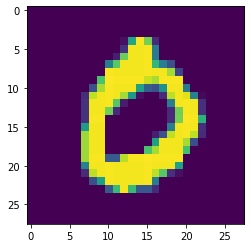

Prediction of the simple neural network is 0 while the prediction of the CNN is 0


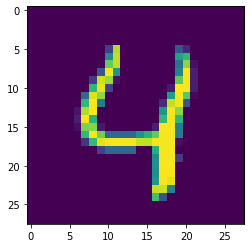

Prediction of the simple neural network is 4 while the prediction of the CNN is 4


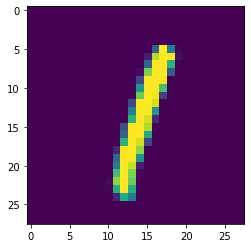

Prediction of the simple neural network is 1 while the prediction of the CNN is 1


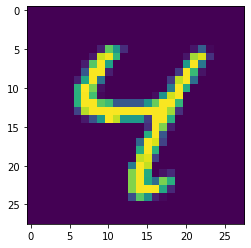

Prediction of the simple neural network is 4 while the prediction of the CNN is 4


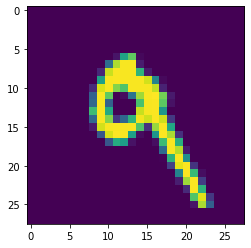

Prediction of the simple neural network is 9 while the prediction of the CNN is 9


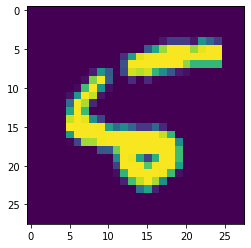

Prediction of the simple neural network is 5 while the prediction of the CNN is 6


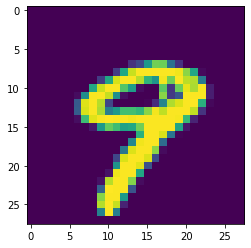

Prediction of the simple neural network is 9 while the prediction of the CNN is 9


In [94]:
# show predictions of both networks 

print(x_test_nn.shape)

for image in x_test[:10]:
    
    
    second_pred = np.argmax(cnn_mod.predict(np.expand_dims(image,axis=0)))
    
    first_pred = np.argmax(model.predict(np.expand_dims(image.reshape(28,28),axis =0)))
    plt.imshow(image.reshape(28,28))
    
    plt.show()

    print('Prediction of the simple neural network is',second_pred,'while the prediction of the CNN is',first_pred)